In [1]:
import argparse  
from code_part1 import foo
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

In [125]:
import math

def getNpArr(data):
    N = len(data)
    tot_data_X = np.random.randn(N, 3)
    tot_data_y = np.random.randn(N, 1)
    for i in range(N):
        if (len(data[i])>1):
            tot_data_y[i][0] = float(data[i][1])
        temp = data[i][0].split('/')
#         tot_data_X[i][0] = (float(temp[0])-6.5)/math.sqrt(143/12) # Normalizing for better convergence
        tot_data_X[i][1] = (float(temp[2])-9.5) # Centering around 0 #Year
        tot_data_X[i][2] = (float(temp[0])-6.5) # centering around 0 #Month
        tot_data_X[i][0] = (float(temp[2]))/31.0 # Getting values roughly from 0 to 1 #Day
        tot_data_X[i][0] = tot_data_X[i][0]+tot_data_X[i][2] #sort of creates a linearity in dates
        
    return tot_data_X[:, :2], tot_data_y


df = pd.read_csv("2 Train.csv", header=None)
df = df[1:].sample(n = len(df)-1)
train_data = np.array(df.values)[:100]
dev_data = np.array(df.values)[100:]
train_X, train_y = getNpArr(train_data)
dev_X, dev_y = getNpArr(dev_data)

df = pd.read_csv("2 Test.csv", header=None)
df = df[1:]
test_data = np.array(df.values)
test_X, test_y = getNpArr(test_data)

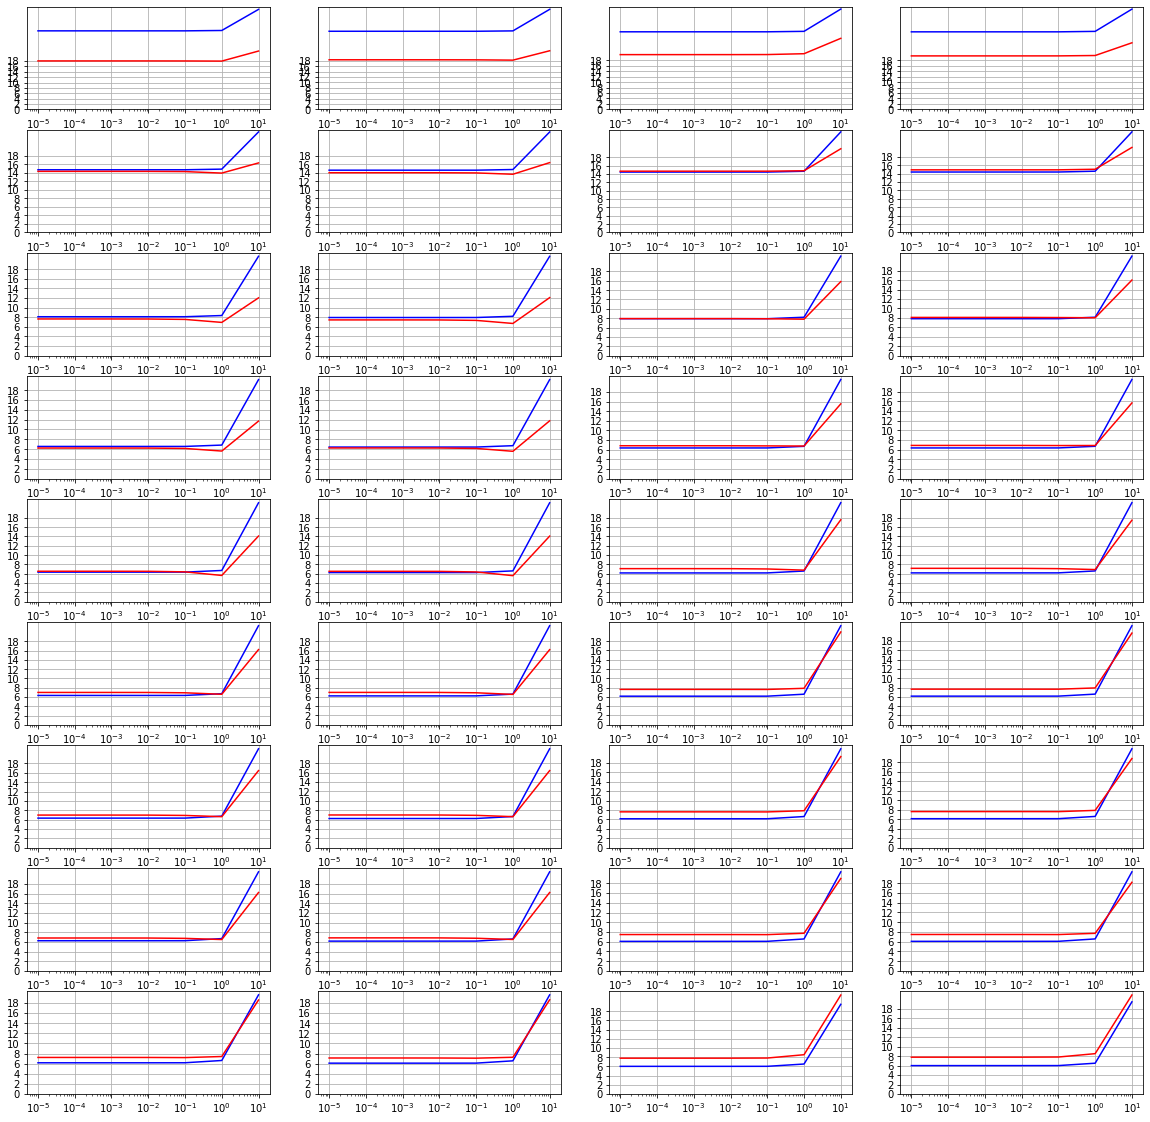

In [141]:

M=np.arange(2, 11, 1) ##DATE
N=np.arange(2, 6, 1) ##YEAR
lmm=np.logspace(-5, 1, num=7)

figure, axes = plt.subplots(nrows=len(M), ncols=len(N), figsize=(20,20))

train_date = train_X[:,0]
train_year = train_X[:,1]
test_date = test_X[:,0]
test_year = test_X[:,1]
dev_date = dev_X[:,0]
dev_year = dev_X[:,1]


X_new_train_year = train_year
temp_X_train_year = train_year

X_new_dev_year = dev_year
temp_X_dev_year = dev_year

X_new_test_date = test_date
temp_X_test_date = test_date
X_new_test_year = test_year
temp_X_test_year = test_year

for idxn, n in enumerate(N): ##YEAR
    temp_X_train_year = temp_X_train_year*train_year
    X_new_train_year = np.c_[X_new_train_year, temp_X_train_year]

    temp_X_dev_year = temp_X_dev_year*dev_year
    X_new_dev_year = np.c_[X_new_dev_year, temp_X_dev_year]

    temp_X_test_year = temp_X_test_year*test_year
    X_new_test_year = np.c_[X_new_test_year, temp_X_test_year]

#     X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
    
    X_new_train_date = train_date
    temp_X_train_date = train_date
    X_new_dev_date = dev_date
    temp_X_dev_date = dev_date
    
    
    for idxm, m in enumerate(M): ##DATE
        temp_X_train_date = temp_X_train_date*train_date
        X_new_train_date = np.c_[X_new_train_date, temp_X_train_date]

        temp_X_dev_date = temp_X_dev_date*dev_date
        X_new_dev_date = np.c_[X_new_dev_date, temp_X_dev_date]

        temp_X_test_date = temp_X_test_date*test_date
        X_new_test_date = np.c_[X_new_test_date, temp_X_test_date]

        E_train = []
        E_dev = []
        
        for lamb in lmm:
            X_fin_train = np.c_[np.ones((len(train_X), 1)), X_new_train_year, X_new_train_date]    
#             print(X_fin_train.shape)
            X_fin_dev = np.c_[np.ones((len(dev_X), 1)), X_new_dev_year, X_new_dev_date]    

            X_fin_test = np.c_[np.ones((len(test_X), 1)), X_new_test_year, X_new_test_date]    

            theta_best = np.linalg.inv((lamb*np.identity(n+m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)

            y_hat_train = X_fin_train.dot(theta_best)
            err  = sum((y_hat_train-train_y)**2)
            err/=len(y_hat_train)
#             print("Train error for M=%s: "%(m), math.sqrt(err))
            E_train.append(err)

            y_hat_dev = X_fin_dev.dot(theta_best)
            err  = sum((y_hat_dev-dev_y)**2)
            err/=len(y_hat_dev)
#             print("Test error for M=%s: "%(m), math.sqrt(err))
            E_dev.append(err)
        axes[idxm, idxn].plot(lmm, E_train, color='b')
        axes[idxm, idxn].plot(lmm, E_dev, color='r')
        axes[idxm, idxn].set_xscale("log")
        axes[idxm, idxn].set_xticks(lmm)
        axes[idxm, idxn].set_yticks(np.arange(0,20,2))
        axes[idxm, idxn].grid()

plt.savefig('part_2dayMonth2_10year2_5.png')
plt.show()

In [110]:
from datetime import datetime
# y_hat_test = model.predict(test_X)
y_hat_test = X_fin_test.dot(theta_best)
# print(y_hat_test)
ff = np.c_[test_data, y_hat_test]
# print(ff)
df = pd.DataFrame(data = ff, columns = ["id", "value"])

now = datetime.now()
k = str(now).split(':')
p = k[0][-2:] + '_' + k[1] + '_' + k[2].split('.')[0]
p=k[0].split('-')[2][:2]+'_'+k[0].split('-')[1]+'_'+p

df.to_csv("test1_"+p+".csv", index=False)
df.head(10)

,id,value
0,5/1/10,25.755881
1,4/1/09,22.128554
2,9/1/13,5.252384
3,1/1/06,3.54638
4,2/1/07,6.248195
5,8/1/12,12.473622
6,6/1/14,22.955081
7,3/1/08,14.566417
8,12/1/04,0.754916
9,7/1/11,19.540575
